In [2]:
from utils.analyze import load_data, detrend2D, wiener, sensor_function, sample_shape, sgolay2d, interpolate_background
from utils.plot import plot, ProfileBuilder, plot_profile
import matplotlib.pyplot as plt
import numpy as np
import scipy.ndimage as ndi
#from scipy.ndimage import imread
#from scipy.ndimage.interpolation import rotate
%matplotlib notebook

In [3]:
x, y, z, T, t, settings = load_data("four_2")
x = x[0]
y = y[0]
settings = settings[0]
print(len(z))
settings

2


{'change_direction': True,
 'data_logger_channel': 101,
 'data_points': 169,
 'direction': ('x', 'y'),
 'extent': ((27, 42.5, 0.1), (2, 18, 0.1)),
 'mode': 'absolute',
 'sampling_time': 0.256,
 'sensors': ['1161']}

<IPython.core.display.Javascript object>


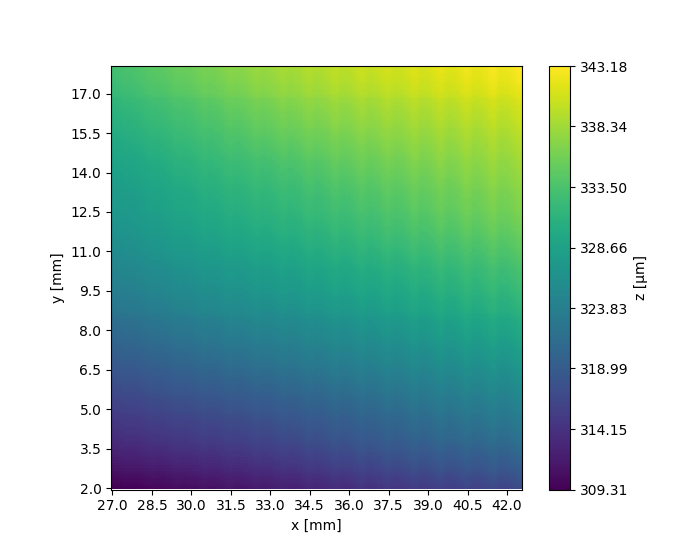

<IPython.core.display.Javascript object>


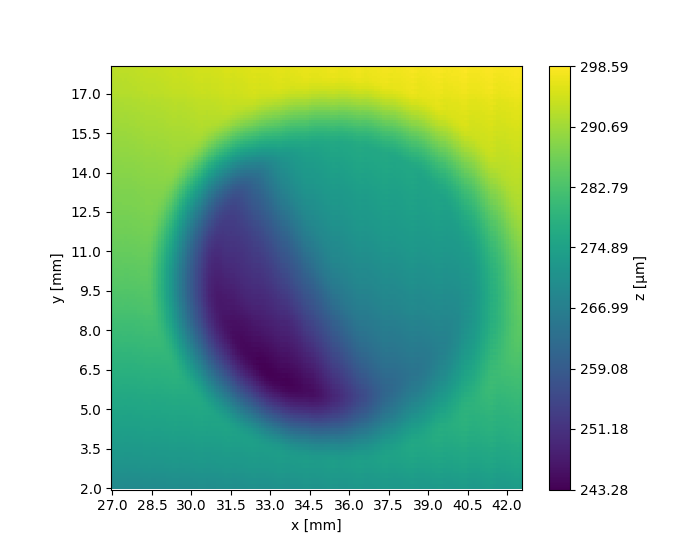

(<matplotlib.figure.Figure at 0x7f02b993f898>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f02b94c4080>)

In [9]:
plot(x, y, background)
plot(x, y, sensor)

<IPython.core.display.Javascript object>


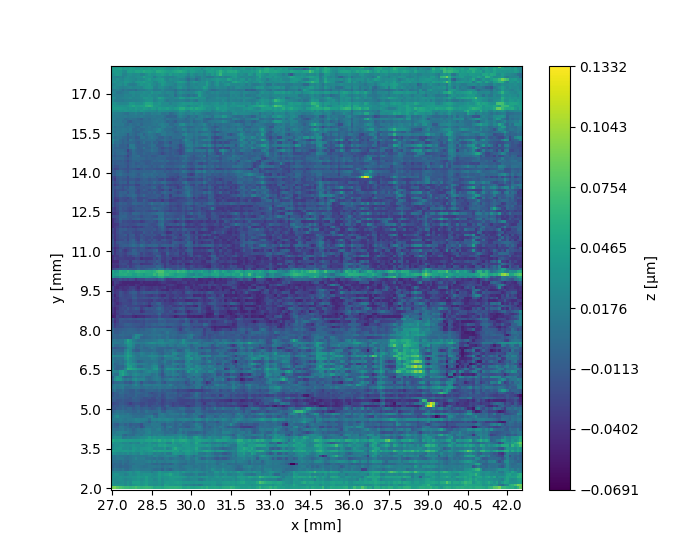

<IPython.core.display.Javascript object>


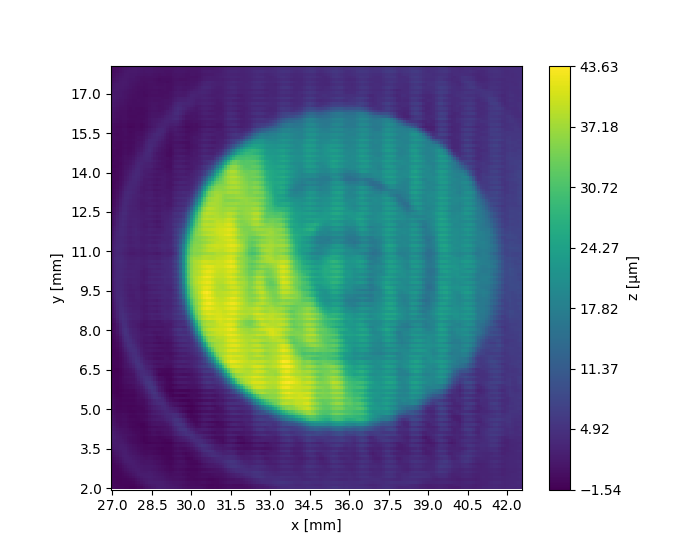

In [5]:
x_bg, y_bg, z_bg, _, _, _ = load_data("background_anschlag")
x_bg = x_bg[0]
y_bg = y_bg[0]
z_bg = z_bg[0][0]

background = interpolate_background(x_bg, y_bg, z_bg, x, y)
#plot(x, y, background)

sensor = z[1][0]
signal = background - sensor
signal -= signal.min()

zz = np.concatenate(z)
noise_std = detrend2D(np.std(zz, axis=0))

#limits = (0, 100)

#plot(x, y, signal)
#plot(x, y, 0.5 * (noise + noise2))
plot(x, y, noise_std)

#plt.figure()
#plt.imshow(noise[90:,:90], origin='lower')

diameter = 2.57
sigma = 0
factor = 1
theta=0
phi=-30
stepsize = settings['extent'][0][2]

kernel = sensor_function(diameter / stepsize, sigma, theta=theta, phi=phi, z0=factor * sensor.mean()/1000/stepsize)
z_reconstructed = wiener(signal, kernel, 0.0007, 1, extra=5)

#z_reconstructed = ndi.filters.median_filter(z_reconstructed, 10)

fig, ax = plot(x, y, z_reconstructed)
#fig, ax = plot(x, y, z_reconstructed, limits=limits, psf=kernel)
#profile = ProfileBuilder(fig, ax)